## Data Analysis and Visualisation

**Name - Harsh Bamotra** <br>
**Roll No. - AC-1216**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1. Consider the following data frame containing family names, gender of the family member and her/his monthly income in each record.** 

In [2]:
df = pd.read_csv("Family.csv")
df

,Name,Gender,MonthlyIncome
0,Shah,Male,114000
1,Vats,Male,65000
2,Vats,Female,43150
3,Kumar,Female,69500
4,Vats,Female,155000
5,Kumar,Male,103000
6,Shah,Male,55000
7,Shah,Female,112400
8,Kumar,Female,81030
9,Vats,Male,71900


**a) Calculate and display family wise gross monthly income.**

In [3]:
result = df.groupby(["Name"]).sum("MonthlyIncome")
result.rename(columns = {"MonthlyIncome":"Gross Income"}, inplace = True)
result

,Gross Income
Name,
Kumar,253530
Shah,281400
Vats,335050


**b) Calculate and display the member with the highest monthly income in a family.**

In [4]:
result = df.groupby(["Name"]).max()
result.rename(columns = {"MonthlyIncome":"Maximum Income"}, inplace = True)
result

,Gender,Maximum Income
Name,,
Kumar,Male,103000
Shah,Male,114000
Vats,Male,155000


**c) Calculate and display monthly income of all members with income greater than Rs. 60000.**

In [5]:
df[df["MonthlyIncome"] > 60000]

,Name,Gender,MonthlyIncome
0,Shah,Male,114000
1,Vats,Male,65000
3,Kumar,Female,69500
4,Vats,Female,155000
5,Kumar,Male,103000
7,Shah,Female,112400
8,Kumar,Female,81030
9,Vats,Male,71900


**d) Calculate and display the average monthly income of the female members in the Shah family.**

In [6]:
df[(df["Gender"] == "Female") & (df["Name"] == "Shah")].groupby(["Name"]).mean("Mean")

,MonthlyIncome
Name,
Shah,112400.0


**e) Find the family name in which females average income is maximum.**

In [7]:
print("The family with maximum average income ::", df[df["Gender"] == "Female"].groupby(["Name"]).mean("Mean").idxmax()[0])

The family with maximum average income :: Shah


**f) Compare member count and average income for each family using appropriate plot.**

[]

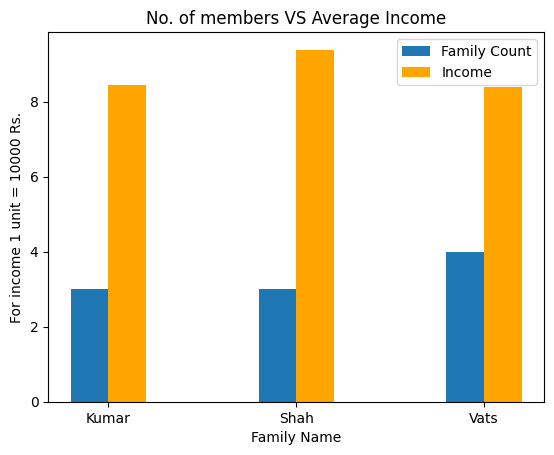

In [8]:
count = df.groupby(["Name"]).count()["Gender"]
avgincome = df.groupby(["Name"]).mean("Average Income")["MonthlyIncome"]/10000
plt.bar(np.arange(len(count)) - 0.1, count, width = 0.2, label = "Family Count")
plt.bar(np.arange(len(count)) + 0.1, avgincome, color = "orange" , width = 0.2, label = "Income")
plt.xticks(np.arange(len(count)), count.keys())
plt.title("No. of members VS Average Income")
plt.xlabel("Family Name")
plt.ylabel("For income 1 unit = 10000 Rs.")
plt.legend()
plt.plot()

**g) Draw a pie chart for each family to show their income distribution gender wise.**

In [9]:
result = df.groupby(["Name", "Gender"]).sum().reset_index()
result

,Name,Gender,MonthlyIncome
0,Kumar,Female,150530
1,Kumar,Male,103000
2,Shah,Female,112400
3,Shah,Male,169000
4,Vats,Female,198150
5,Vats,Male,136900


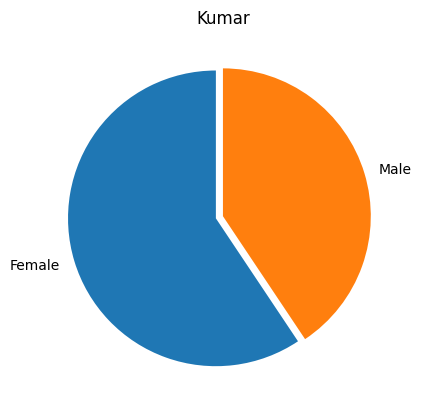

_____________________________________________________


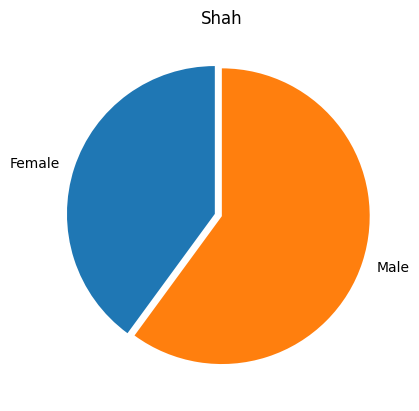

_____________________________________________________


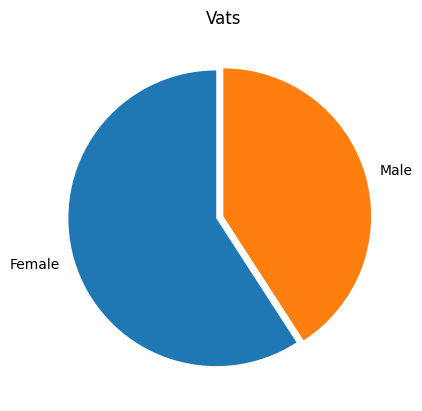

In [10]:
for i in range(0, len(result), 2):
    plt.pie([result.iloc[i, 2], result.iloc[i+1, 2]], labels = ["Female", "Male"], explode = [0.05, 0], startangle = 90)
    plt.title(result.iloc[i, 0])
    plt.show()
    if(i < 4):
        print("_____________________________________________________")

**Q2. Use tips data to do the following: see appropriate parameters for figs/plots.**

In [11]:
tipData = sns.load_dataset("tips")
tipData

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**a) Compare average tips paid by smoker and non-smokers on weekdays and weekends individually using bar plot.**

In [12]:
weekend = lambda x: True if x in ["Sun", "Sat"] else False
tipData["Weekend"] = tipData["day"].apply(weekend)
result = tipData.groupby(["smoker", "Weekend"]).mean("Average Tip")["tip"]
result.get("Yes").keys()

Index([False, True], dtype='bool', name='Weekend')

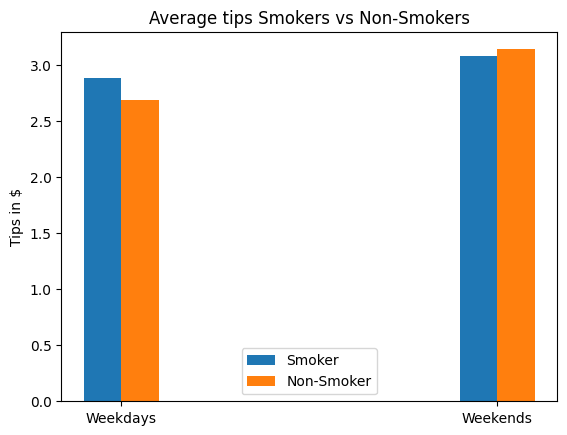

In [13]:
plt.bar(np.arange(len(result.get("Yes"))) - 0.05, list(result.get("Yes")), label = "Smoker", width = 0.1)
plt.bar(np.arange(len(result.get("No"))) + 0.05, list(result.get("No")), label = "Non-Smoker", width = 0.1)
plt.title("Average tips Smokers vs Non-Smokers")
plt.ylabel("Tips in $")
plt.xticks(np.arange(len(result.get("No"))), ["Weekdays" , "Weekends"])
plt.legend()
plt.show()

**b) Compare the distribution of bill amount of bills paid on weekday and week end.**

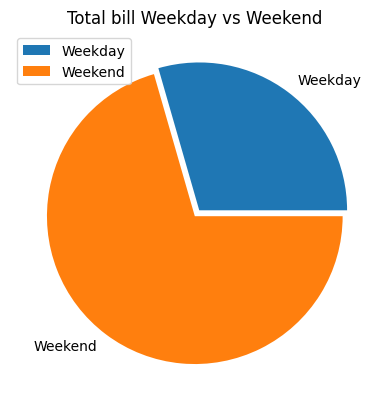

In [14]:
result = tipData.groupby(["Weekend"]).sum("Total Bill")["total_bill"]
plt.pie(result.values, labels = ["Weekday", "Weekend"], explode = [0.05, 0])   #incomplete
plt.title("Total bill Weekday vs Weekend")
plt.legend()
plt.show()

**c) Identify outlier in the bill amount of females customers (explicitly mention the formula used to detect outliers) and show using appropriate plot.**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb518e26b60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb518e270a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb518e268c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb518e275e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb518e27880>],
 'means': []}

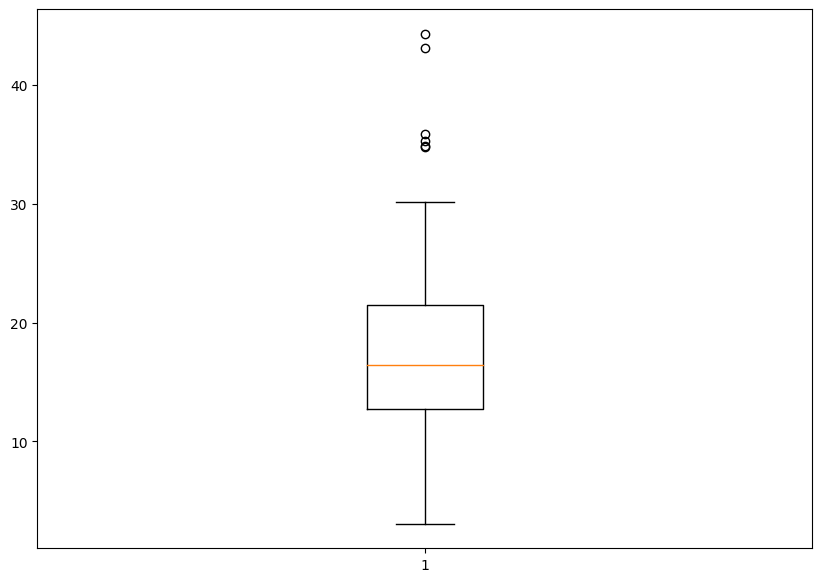

In [15]:
result = tipData[tipData["sex"] == "Female"]["total_bill"]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(result)

In [22]:
result_df = result.to_frame(name = "total_bill")
Q1 = result_df["total_bill"].quantile(0.25)
Q2 = result_df["total_bill"].quantile(0.5)
Q3 = result_df["total_bill"].quantile(0.75)
print("Q1 = ", Q1, "\nQ2 = ", Q2, "\nQ3 = ", Q3)

Q1 =  12.75 
Q2 =  16.4 
Q3 =  21.520000000000003


In [24]:
IQR = (Q3 - Q1)
val_low = Q1 - 1.5*IQR
val_up = Q3 + 1.5*IQR            #calculating upper and lower outliners 

**Finding outliners**

In [25]:
result_df[(result_df["total_bill"] > val_up)|(result_df["total_bill"] < val_low)]

,total_bill
11,35.26
52,34.81
85,34.83
102,44.30
197,43.11
238,35.83


**d) Find the size of customers who have paid maximum tip on weekend.**

In [16]:
print("Customer with maximum tip on the weekend ::" , tipData.loc[tipData[tipData["Weekend"] == True][["tip", "size"]].idxmax()["tip"], "size"])

Customer with maximum tip on the weekend :: 3


**e) Compare the average amount of bill paid by females and males customers on all days (using line plot, xaxis has four tics corresponding to day).**

In [17]:
male = tipData.groupby(["sex", "day"]).mean("Average_Bill")["total_bill"]["Male"]
female = tipData.groupby(["sex", "day"]).mean("Average_Bill")["total_bill"]["Female"]

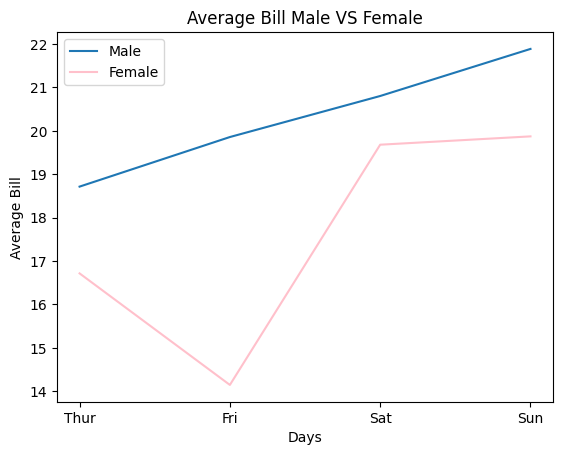

In [18]:
plt.plot(male.keys(), male.values, label = "Male")
plt.plot(female.keys(), female.values, label = "Female", color = "pink")
plt.title("Average Bill Male VS Female")
plt.xlabel("Days")
plt.ylabel("Average Bill")
plt.legend()
plt.show()